# Zipline

## Informace o notebooku

In [1]:
NB_VERSION = 1,0

import sys
import datetime
import pandas as pd

import zipline
%load_ext zipline

print('Verze notebooku:', '.'.join(map(str, NB_VERSION)))
print('Verze pythonu:', '.'.join(map(str, sys.version_info[0:3])))
print('---')
print('Zipline:', zipline.__version__)
print('Pandas:', pd.__version__)

Verze notebooku: 1.0
Verze pythonu: 3.6.2
---
Zipline: 1.1.1
Pandas: 0.18.1


## Zipline info

V minulém příspěvku o [backtestu](https://vanheckblog.blogspot.cz/2017/08/tvorba-obchodni-strategie-backtest.html), jsem se zabýval jak pomocí pandas provést backtest. `Pandas` je velmi mocný pomocník při algoritmickém obchodování, ale backtestování pomocí pandas je náchylné na chyby, už jen z toho důvodu, že pandas je zaměřený na analýzu dat obecně. Všechny datové sloupce si tam člověk musí vytvořit a vypočítat pomocí vzorců manuálně. Existují ale i nástroje, které `pandas` využívají a funkcionalitu zaměřenou na algoritmické obchodování už mají zabudovanou v sobě. Člověk se tak může zaměřit přímo na obchodování (skládání portfolií a logiku vstupů/výstupů). Backtest a jeho výsledky mu pak provede takovýto nástroj. Jedním z takových nástrojů je právě [Zipline](http://www.zipline.io/). 

`Zipline` je open-source knihovna pro python, kterou vyvíjí lidé kolem [Quantopianu](https://www.quantopian.com/) a jejich komunita. Podporuje jak backtesting, tak i přímo live-trading a Quantopian používá tuto knihovnu jako backend pro jejich [notebooky](https://www.quantopian.com/notebooks/survey) a [algoritmy](https://www.quantopian.com/algorithms).

## Instalace

Instaluje se přes pip - stačí v příkazové řádce spustit příkaz:
```sh
pip install zipline
```

Po instalaci je třeba ještě říct zipline, jaký zdroj dat má použít. To se provede příkazem `zipline ingest`. Tím se aktivuje defaultní zdroj dat `Quandl`:
```sh
zipline ingest
```

## Funkce initialize a handle_data

Každý algoritmus v zipline využívá dvě funkce:
* `initialize(context)`, která se volá jako první na začátku spuštění, v parametru `context` se definují proměnné, které jsou třeba a nemění se s novými daty.
* `handle_data(context, data)`, volá se pokaždé, když jsou připravená nová data trhu.

Takže v jednoduchosti si do funkce `initialize()` definuju jaký trh chci obchodovat - jaké data mě zajímají, a popř. určité nastvení, které chci uchovat po celý průběh algoritmu.

Do funkce `handle_data()` naprogramuju svůj obchodní systém na bázi křížení klouzavých průměrů, jde prakticky o stejnou strategii jako jsem psal v minulém příspěvku.

Nakonec ještě doplním volitelnou funkci `analyze()`, která se zavolá na konci celého procesu a zobrazí mi výsledky.

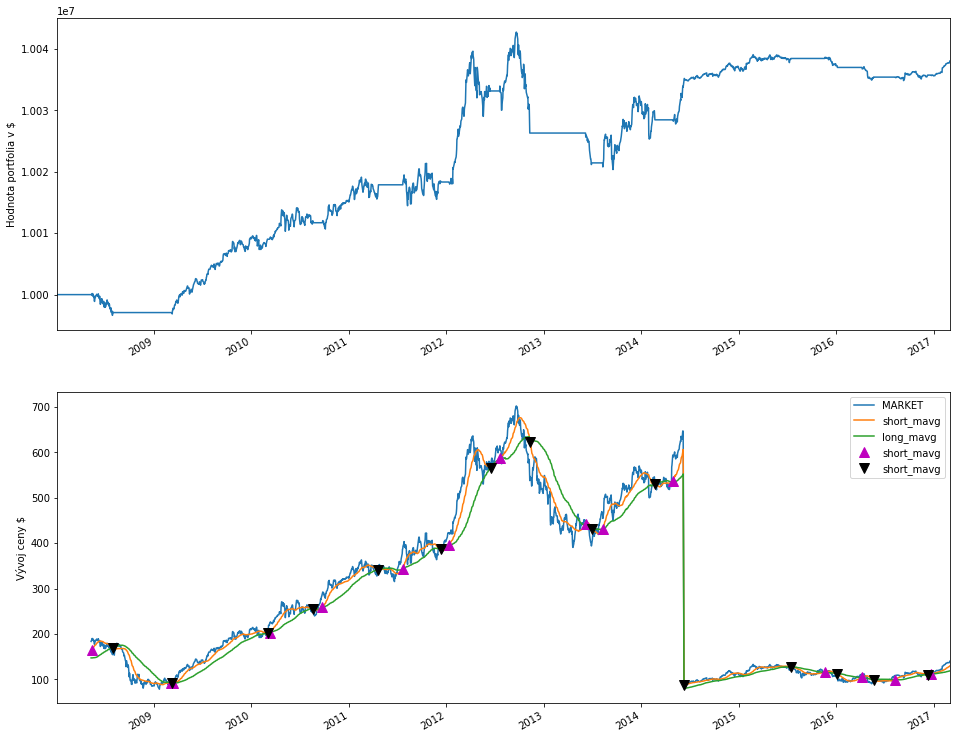

,MARKET,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2008-01-02 21:00:00+00:00,NaN,NaN,0.000000,NaN,-0.008755,NaN,NaN,0.0,1.000000e+07,0.0,...,NaN,0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0391
2008-01-03 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.009233,0.092848,0.000000,0.0,1.000000e+07,0.0,...,NaN,0,0,NaN,1.000000e+07,0.0,0.0,2,[],0.0391
2008-01-04 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.033513,0.193737,0.000000,0.0,1.000000e+07,0.0,...,NaN,0,0,NaN,1.000000e+07,0.0,0.0,3,[],0.0388
2008-01-07 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.034334,0.178424,0.000000,0.0,1.000000e+07,0.0,...,NaN,0,0,NaN,1.000000e+07,0.0,0.0,4,[],0.0386
2008-01-08 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.049928,0.163436,0.000000,0.0,1.000000e+07,0.0,...,NaN,0,0,NaN,1.000000e+07,0.0,0.0,5,[],0.0386
2008-01-09 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.039943,0.198227,0.000000,0.0,1.000000e+07,0.0,...,NaN,0,0,NaN,1.000000e+07,0.0,0.0,6,[],0.0382
2008-01-10 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.033650,0.197672,0.000000,0.0,1.000000e+07,0.0,...,NaN,0,0,NaN,1.000000e+07,0.0,0.0,7,[],0.0391
2008-01-11 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.041447,0.183920,0.000000,0.0,1.000000e+07,0.0,...,NaN,0,0,NaN,1.000000e+07,0.0,0.0,8,[],0.0382
2008-01-14 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.033719,0.185841,0.000000,0.0,1.000000e+07,0.0,...,NaN,0,0,NaN,1.000000e+07,0.0,0.0,9,[],0.0381
2008-01-15 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.054989,0.197766,0.000000,0.0,1.000000e+07,0.0,...,NaN,0,0,NaN,1.000000e+07,0.0,0.0,10,[],0.0372


In [2]:
%%zipline --start 2008-1-1 --end 2017-3-1

from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.my_smb = 'AAPL'
    context.asset = symbol(context.my_smb)

    context.short_period = 30
    context.long_period = 90
    

def handle_data(context, data):
    # Přeskočím 90 dní, aby se mohl správně vypočítat
    # klouzavý průměr s delší periodou
    context.i += 1
    if context.i < context.long_period:
        return

    short_mavg = data.history(context.asset, 'price', bar_count=context.short_period, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=context.long_period, frequency="1d").mean()

    # Obchodní logika - nákup 100 akcií v případě překročení klouzavého průměru nahoru
    if short_mavg > long_mavg:
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Pomocí record uložím hodnoty, které můžu zpracovat později
    record(MARKET=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)
    

def analyze(context, perf):
    fig = plt.figure(figsize=(16,14))
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('Hodnota portfolia v $')

    ax2 = fig.add_subplot(212)
    perf['MARKET'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('Vývoj ceny $')
    plt.legend(loc=0)
    plt.show()

# Závěr

Využil jsem vzorový příklad z dokumentace Zipline. Samozřejmě, že backtest není vše, co zipline umí. Je příjemné, že pokud připravím kód pro zipline, tak stačí jen malá úprava a můžu algoritmus nasadit pro živé obchodování *(NE, že bych tento konkrétní algoritmus chtěl ve skutečnosti obchodovat!)*, nebo ho použít jako algoritmus do platformy Quantopian a nechat si zobrazit další výsledky, či ho umístit na fórum [Quantopian komunity](https://www.quantopian.com/posts) a podělit se s ním se světem.

Bohužel jsem měl problém s daty z defaultního datového zdroje. Vývoj akcie `'APPL'` (někdy od poloviny roku 2014) neodpovídá skutečnosti. Mám neblahé tušení, že to má něco společného se službou `Quandl` a ukončení poskytování zdarma dostupných dat ze služeb Google Finance či Yahoo finance. Ale na vzorový příklad pro `zipline`, jako hlavní účel tohoto postu, to nemá vliv a zde se opravou zabývat nebudu.

# Zdroje

1. [Python For Finance: Algorithmic Trading](https://www.datacamp.com/community/tutorials/finance-python-trading#gs.G7zoXWs)
+ [Quandl](https://www.quandl.com/)
+ [Quantopian](https://www.quantopian.com/)
+ [Zipline](ttps://www.quantopian.com/)